<a href="https://colab.research.google.com/github/emiraydn21/Python/blob/main/%C4%B0YSA_Aktivasyon_Fonksiyonlari_Deneyi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aktivasyon Fonksiyonları Deneyi


**1-) Gerekli Kütüphaneleri Yüklüyoruz.**




In [404]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

**2-) Karşılaştırma yapacağımız Aktivasyon Fonksiyonlarını Ekliyoruz.**

In [405]:
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): s = sigmoid(x); return s * (1 - s)

def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

def tanh(x): return np.tanh(x)
def tanh_deriv(x): return 1 - np.tanh(x) ** 2

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def cross_entropy(pred, true):
    return -np.mean(np.sum(true * np.log(pred + 1e-9), axis=1))


**3-) Veri setini Yükleyip Eğitim(%80) ve Test(%20) olarak 2'ye ayırıyoruz**

In [406]:
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


**4-) Aktivasyon Fonksiyonuna Göre Modeli Eğitiyoruz ve Test Ediyoruz.**

In [407]:
# Eğitim fonksiyonu
def train_model(activation, activation_deriv, epochs=100, lr=0.01):
    input_size, hidden_size, output_size = 4, 8, 3  #burada ise giriş ara ve çıkış katmanlarını belirliyoruz.

# İlk ağırlıklar (W1, W2) rastgele seçiliyor, bias'lar sıfır olarak başlatılıyor.
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    losses, accuracies = [], []
    for epoch in range(epochs):
        # Forward = ileri geçişi hesaplıyoruz
        z1 = X_train @ W1 + b1
        a1 = activation(z1)
        z2 = a1 @ W2 + b2
        a2 = softmax(z2)

        # Loss
        loss = cross_entropy(a2, y_train)
        losses.append(loss)

        # Accuracy
        acc = np.mean(np.argmax(a2, axis=1) == np.argmax(y_train, axis=1))
        accuracies.append(acc)

        # Geri yayılım
        dz2 = a2 - y_train
        dW2 = a1.T @ dz2 / len(X_train)
        db2 = np.sum(dz2, axis=0, keepdims=True) / len(X_train)

        da1 = dz2 @ W2.T
        dz1 = da1 * activation_deriv(z1)
        dW1 = X_train.T @ dz1 / len(X_train)
        db1 = np.sum(dz1, axis=0, keepdims=True) / len(X_train)

        # Ağırlık değerlerini ve biası güncelliyorusz.
        W2 -= lr * dW2; b2 -= lr * db2
        W1 -= lr * dW1; b1 -= lr * db1

    # Test verisi için son tahminleri yapıyoruz.
    z1 = X_test @ W1 + b1
    a1 = activation(z1)
    z2 = a1 @ W2 + b2
    a2 = softmax(z2)
    test_acc = np.mean(np.argmax(a2, axis=1) == np.argmax(y_test, axis=1))

    return losses, accuracies, test_acc


**5-) Farklı Aktivasyon Fonksiyonlarının Performansını Karşılaştırıyoruz.**

In [408]:
losses_dict = {}
acc_dict = {}
test_scores = {}

for name, act, deriv in [
    ("Sigmoid", sigmoid, sigmoid_deriv),  # Sigmoid aktivasyon fonksiyonu ve türev fonksiyonu
    ("ReLU", relu, relu_deriv),          # ReLU aktivasyon fonksiyonu ve türev fonksiyonu
    ("Tanh", tanh, tanh_deriv)           # Tanh aktivasyon fonksiyonu ve türev fonksiyonu
]:
    losses, accs, test_acc = train_model(act, deriv)
    losses_dict[name] = losses
    acc_dict[name] = accs
    test_scores[name] = test_acc


**Eğitim Kayıp ve Doğruluk Grafiklerini Çizdiriyoruz.**

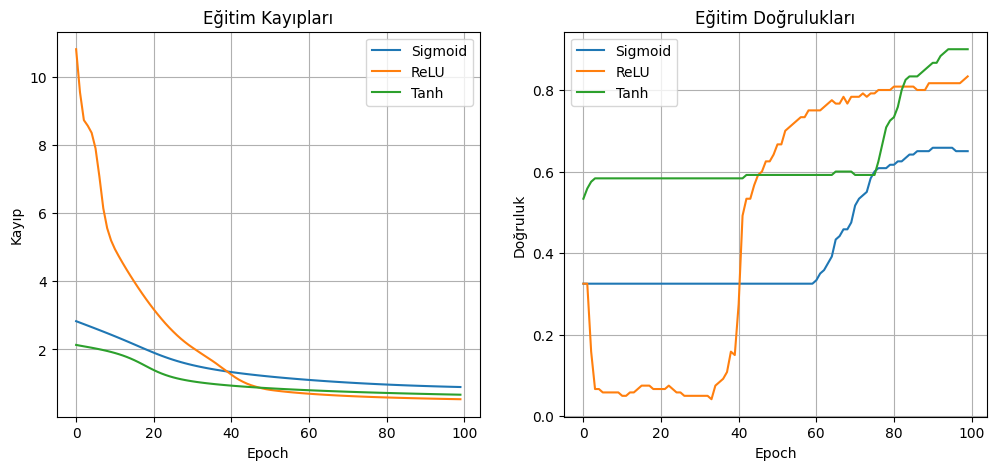

In [409]:
plt.figure(figsize=(12, 5))  # Grafiklerin boyutunu ayarlıyoruz.

# Kayıp grafiğini çizdiriyoruz.
plt.subplot(1, 2, 1)
for k, v in losses_dict.items():
    plt.plot(v, label=k)
plt.title("Eğitim Kayıpları")
plt.xlabel("Epoch")
plt.ylabel("Kayıp")
plt.legend()
plt.grid(True)
plt.savefig("loss_plot.png")

# Doğruluk grafiğini çizdiriyoruz.
plt.subplot(1, 2, 2)
for k, v in acc_dict.items():
    plt.plot(v, label=k)
plt.title("Eğitim Doğrulukları")
plt.xlabel("Epoch")
plt.ylabel("Doğruluk")
plt.legend()
plt.grid(True)
plt.savefig("accuracy_plot.png")
plt.show()

**7-) Test Doğruluklarını Yazdırıyoruz.**

In [410]:
for k, v in test_scores.items():
    print(f"{k} Test Doğruluğu: {v:.4f}")

Sigmoid Test Doğruluğu: 0.7000
ReLU Test Doğruluğu: 0.9000
Tanh Test Doğruluğu: 0.8333
